### **Importing the Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [4]:
df=pd.read_csv('/content/emails.csv')
df

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2250,Email 2251,0,0,1,0,1,0,6,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2251,Email 2252,0,0,2,0,1,0,6,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2252,Email 2253,0,0,1,0,0,0,2,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2253,Email 2254,4,3,1,0,1,17,163,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,0.0,1.0


In [6]:
newdf=df.dropna()
newdf

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2249,Email 2250,0,0,1,0,1,0,5,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2250,Email 2251,0,0,1,0,1,0,6,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2251,Email 2252,0,0,2,0,1,0,6,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2252,Email 2253,0,0,1,0,0,0,2,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
newdf.isnull().sum()

Email No.     0
the           0
to            0
ect           0
and           0
             ..
military      0
allowing      0
ff            0
dry           0
Prediction    0
Length: 3002, dtype: int64

In [8]:
Y=newdf.iloc[:,-1]
print(Y)

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
2249    0.0
2250    0.0
2251    0.0
2252    0.0
2253    1.0
Name: Prediction, Length: 2254, dtype: float64


In [9]:
X=newdf.iloc[:,1:-1]
X

,the,to,ect,and,for,of,a,you,hou,in,...,enhancements,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry
0,0,0,1,0,0,0,2,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,8,13,24,6,6,2,102,1,27,18,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0,0,1,0,0,0,8,0,0,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,5,22,0,5,1,51,2,10,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,7,6,17,1,5,2,57,0,9,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2249,0,0,1,0,1,0,5,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2250,0,0,1,0,1,0,6,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2251,0,0,2,0,1,0,6,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2252,0,0,1,0,0,0,2,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y ,random_state=104,test_size=0.25,shuffle=True)

In [11]:
print('X_train : ')
print(X_train.head())

X_train : 
      the  to  ect  and  for  of   a  you  hou  in  ...  enhancements  \
1295    8   9    1    8    4   5  61    4    1  21  ...           0.0   
1175    5   3    3    2    3   2  22    1    0   1  ...           0.0   
984     3   4    1    0    1   1  35    1    0   8  ...           0.0   
664     0   0    1    3    0   1  18    1    0   3  ...           0.0   
1101    8   3    2    3    1   1  34    0    1  11  ...           0.0   

      connevey  jay  valued  lay  infrastructure  military  allowing   ff  dry  
1295       0.0  0.0     0.0  0.0             0.0       0.0       0.0  4.0  0.0  
1175       0.0  0.0     0.0  0.0             0.0       0.0       0.0  0.0  0.0  
984        0.0  0.0     0.0  0.0             0.0       0.0       0.0  0.0  0.0  
664        0.0  0.0     0.0  0.0             0.0       0.0       0.0  0.0  0.0  
1101       0.0  0.0     0.0  0.0             0.0       0.0       0.0  1.0  0.0  

[5 rows x 3000 columns]


In [12]:
print("Y_train : ")
print(Y_train.head())

Y_train : 
1295    0.0
1175    0.0
984     0.0
664     0.0
1101    0.0
Name: Prediction, dtype: float64


In [13]:
print("X_test : ")
print(Y_train.head())

X_test : 
1295    0.0
1175    0.0
984     0.0
664     0.0
1101    0.0
Name: Prediction, dtype: float64


In [14]:
print("Y_test :")
Y_test

Y_test :


1838    0.0
80      0.0
1970    0.0
1079    0.0
1848    0.0
       ... 
1686    0.0
1999    1.0
909     1.0
302     1.0
691     1.0
Name: Prediction, Length: 564, dtype: float64

## **1.Logistic Regression**

In [17]:
lr = LogisticRegression()
lr

LogisticRegression()

In [18]:
lr.fit(X_train, Y_train)


lr_train = lr.predict(X_train)
lr_test = lr.predict(X_test)


lr_train_acc = accuracy_score(Y_train, lr_train)
lr_test_acc = accuracy_score(Y_test, lr_test)


lr_precision = precision_score(Y_test, lr_test)
lr_recall = recall_score(Y_test, lr_test)
lr_f1 = f1_score(Y_test, lr_test)


print("Logistic Regression:\n")
print("Training Data Accuracy:", lr_train_acc)
print("Testing Data Accuracy :", lr_test_acc)

print("Precision             :", lr_precision)
print("Recall                :", lr_recall)
print("F1 Score              :", lr_f1)

Logistic Regression:

Training Data Accuracy: 0.9976331360946745
Testing Data Accuracy : 0.9645390070921985
Precision             : 0.9457831325301205
Recall                : 0.9345238095238095
F1 Score              : 0.9401197604790419


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## **2.Decision Trees**

In [19]:
dtrees = DecisionTreeClassifier()
dtrees

DecisionTreeClassifier()

In [20]:
dtrees.fit(X_train, Y_train)


dt_train = dtrees.predict(X_train)
dt_test = dtrees.predict(X_test)


dt_train_acc = accuracy_score(Y_train, dt_train)
dt_test_acc = accuracy_score(Y_test, dt_test)


dt_precision = precision_score(Y_test, dt_test)
dt_recall = recall_score(Y_test, dt_test)
dt_f1 = f1_score(Y_test, dt_test)


print("Decision Tress:\n")
print("Training Data Accuracy:", dt_train_acc)
print("Testing Data Accuracy :", dt_test_acc)

print("Precision             :", dt_precision)
print("Recall                :", dt_recall)
print("F1 Score              :", dt_f1)

Decision Tress:

Training Data Accuracy: 1.0
Testing Data Accuracy : 0.8829787234042553
Precision             : 0.7865168539325843
Recall                : 0.8333333333333334
F1 Score              : 0.8092485549132948


## **3.KNN**

In [21]:
knn = KNeighborsClassifier()
knn

KNeighborsClassifier()

In [22]:
knn.fit(X_train, Y_train)


knn_train = knn.predict(X_train)
knn_test = knn.predict(X_test)


knn_train_acc = accuracy_score(Y_train, knn_train)
knn_test_acc = accuracy_score(Y_test, knn_test)


knn_precision = precision_score(Y_test, knn_test)
knn_recall = recall_score(Y_test, knn_test)
knn_f1 = f1_score(Y_test, knn_test)


print("K Nearest Neighbors:\n")
print("Training Data Accuracy:", knn_train_acc)
print("Testing Data Accuracy :", knn_test_acc)

print("Precision             :", knn_precision)
print("Recall                :", knn_recall)
print("F1 Score              :", knn_f1)

K Nearest Neighbors:

Training Data Accuracy: 0.9207100591715977
Testing Data Accuracy : 0.8599290780141844
Precision             : 0.751412429378531
Recall                : 0.7916666666666666
F1 Score              : 0.7710144927536231


## **4.RANDOM FOREST**

In [23]:
rf = RandomForestClassifier()
rf

RandomForestClassifier()

In [24]:
rf.fit(X_train, Y_train)


rf_train = rf.predict(X_train)
rf_test = rf.predict(X_test)


rf_train_acc = accuracy_score(Y_train, rf_train)
rf_test_acc = accuracy_score(Y_test, rf_test)


rf_precision = precision_score(Y_test, rf_test)
rf_recall = recall_score(Y_test, rf_test)
rf_f1 = f1_score(Y_test, rf_test)


print("Random Forest:\n")
print("Training Data Accuracy:", rf_train_acc)
print("Testing Data Accuracy :", rf_test_acc)

print("Precision             :", rf_precision)
print("Recall                :", rf_recall)
print("F1 Score              :", rf_f1)

Random Forest:

Training Data Accuracy: 1.0
Testing Data Accuracy : 0.9539007092198581
Precision             : 0.9733333333333334
Recall                : 0.8690476190476191
F1 Score              : 0.9182389937106918


## **PERFORMANCE METRICS**

In [25]:
train_acc_list = {"LR":lr_train_acc,
                  "DT":dt_train_acc,
                  "KNN":knn_train_acc,
                  "RF":rf_train_acc}

test_acc_list = {"LR":lr_test_acc,
                  "DT":dt_test_acc,
                  "KNN":knn_test_acc,
                  "RF":rf_test_acc}

precision_list = {"LR":lr_precision,
                  "DT":dt_precision,
                  "KNN":knn_precision,
                  "RF":rf_precision}

recall_list = {"LR":lr_recall,
               "DT":dt_recall,
               "KNN":knn_recall,
               "RF":rf_recall}

f1_list = {"LR":lr_f1,
               "DT":dt_f1,
               "KNN":knn_f1,
               "RF":rf_f1}

In [27]:
a1 =  pd.DataFrame.from_dict(train_acc_list, orient = 'index', columns = ["Traning Accuracy"])
a2 =  pd.DataFrame.from_dict(test_acc_list, orient = 'index', columns = ["Testing Accuracy"])
a3 =  pd.DataFrame.from_dict(precision_list, orient = 'index', columns = ["Precision Score"])
a4 =  pd.DataFrame.from_dict(recall_list, orient = 'index', columns = ["Recall Score"])
a5 =  pd.DataFrame.from_dict(f1_list, orient = 'index', columns = ["F1 Score"])

dataframe = pd.concat([a1, a2, a3, a4, a5], axis = 1)
dataframe

,Traning Accuracy,Testing Accuracy,Precision Score,Recall Score,F1 Score
LR,0.997633,0.964539,0.945783,0.934524,0.940120
DT,1.000000,0.882979,0.786517,0.833333,0.809249
KNN,0.920710,0.859929,0.751412,0.791667,0.771014
RF,1.000000,0.953901,0.973333,0.869048,0.918239


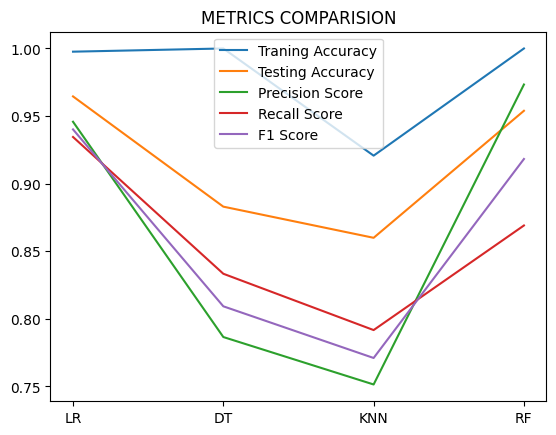

In [33]:
alg = ['LR','DT','KNN','RF']
plt.plot(alg,a1)
plt.plot(alg,a2)
plt.plot(alg,a3)
plt.plot(alg,a4)
plt.plot(alg,a5)
legend = ['Traning Accuracy', 'Testing Accuracy', 'Precision Score', 'Recall Score', 'F1 Score']
plt.title("METRICS COMPARISION")
plt.legend(legend)
plt.show()